# Global Warming Modeling and Identifying Countries with Excessive Pollution (1980 to 2010)

Collaborators: James Allen, Mark Nazzaro, and Jason Li

---

## Introduction:
Global warming is an international issue that many groups have mobilized to fight against, but there are many that believe that this is a fictitious threat. In 2017, President Trump decided the U.S. will drop out of the Paris Agreement, which was an agreement between nations to start reducing their carbon footprint. According to NASA, carbon dioxide in the air is at its highest point in 650,000 years. This greenhouse gas traps sunlight, resulting in an increase in global temperature. One of the effects of this global warming is the melting of the polar ice caps, which causes higher sea levels, which means less land above sea. With a growing population, urbanization and more resources are required, including more space.

This and other dangerous factors threaten the future of generations to come, so this project aims to walk through the data science life cycle and analyze the data pertaining to the effects of global warming, focusing on 1980 to 2010. We will also create a tool to help countries identify where their emission level should be in respect to their population. We will also create a model for predicting the level of emissions among other things over the years to come.

-

References:

“The Discovery of Global Warming.” Global Warming Timeline, Aug. 2021,    https://history.aip.org/climate/timeline.htm.

“Climate Change: Vital Signs of the Planet.” Edited by Holly Shaftel et al, NASA, NASA, 9 Nov. 2021, https://climate.nasa.gov/. 

---

This tutorial covers:
1. Data Collection
2. Tidying The Data
3. Data Visualization

    a. Graphing

    b. Statistical Analysis

4. Data Analysis and Data Modeling

    a. Linear Regression

    b. K-Nearest Neighbors

    c. Random Forests

5. Interpretation and Policy Decision

---

## Data Collection:

#### The Data:

Emission Data - Each row shows a country and its emission data from 1750 -2019 measured in tonnes. The Country column is a String, while other columns are integers.


> Souce: 
> 
>
>Sahu, Srikant. “CO2 And GHG Emission Data.” Kaggle, 26 Sept. 2019, https://www.kaggle.com/srikantsahu/co2-and-ghg-emission-data. 


Population Data - The population by country by year.


> Souce: 
> 
>
> The ML PhD Student. “Countries Population from 1955 to 2020.” Kaggle, 11 Aug. 2020, https://www.kaggle.com/themlphdstudent/countries-population-from-1955-to-2020.

* Year, population, and Country are self-explanatory
* Yearly percent change - this is in terms of the change in population
* Migrants - Net mmigration to and from country
* Median Age - Median Age of country's population
* Fertiliy Rate - Expected number of children of a woman
* Density - people per km^2
* Urban Pop - Percent of population living in cities


Global temperature - This data set describes the average land temperature from 1750 to 2015. 

> Souce: 
>
> 
>Berkeley Earth. "Climate Change: Earth Surface Temperature Data." Kaggle, 1 May 2017, https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/metadata

* Land average temperature - this describes the average temperature of the year
* LandAverageTemperatureUncertainty - this describes the range from average that is changes
* LandMaxTemperature - this is the maximum temperature of the year
* LandMaxTemperatureUncertainty - this is the range from the maximum temperature
* LandMinTemperature - this is the range from the manimum temperature
* LandMinTemperatureUncertainty - this is the range from the minimum temperature
* LandAndOceanAverageTemperature - this is the land and ocean average temperature of the year
* LandAndOceanAverageTemperatureUncertainty - this is the range from the average land and ocean temperature


Sea level - this dataset records the sea level from 1880 to 2013

> Souce: 
>
> 
>Somesh Sharma. "Sea Level Change". Kaggle. 15, August, 2020. https://www.kaggle.com/somesh24/sea-level-change/metadata


* Time - this is the recorded date
* GMSL - global mean sea-level
* GMSL uncertainty - the range which is uncertain 


---

#### Imports:
The following libraries are required for this tutorial:

Pandas - We will be using this library in order to gather and format data into dataframes and then convert these into tidy tables.

Numpy - There is a need to use different mathematical functions and definitions such as NaN, so this library will come in handy later.

Seaborn - This library will be used to visulaize the data in various graphs.

datetime - this is for manipulating variables stored as datetimes in the dataframes.

Matplotlib.pyplot - used by seaborn, this allows us to manipulate and edit the graphs.

Sklearn - this library is used for predicting and classifying data.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import sklearn

# for linear regression
from sklearn.linear_model import LinearRegression

# for K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# for random forest classifier
from sklearn.ensemble import RandomForestClassifier

# for cross validation
from sklearn.model_selection import cross_val_score

#We are using this because warnings take up valuable space
import warnings
warnings.filterwarnings('ignore')

#### Get the Data:
Now we must get each data set into a dataframe/table.

First, we will get the population data.

In [35]:
population = pd.read_csv('population.csv')
population.head()

,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739,1
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100,1
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040,1
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925,1
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049,1


Now we will get the temperature data.

In [36]:
 temperature = pd.read_csv('GlobalTemperatures.csv')
display(temperature.head().iloc[:,[0,1,2,3,4,5]])

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature
0,1750-01-01,3.034,3.574,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN


Now we will get the emission data.

In [37]:
emission = pd.read_csv('emission_data.csv')
display(emission.head().iloc[:,[0,1,2,3,4,5,6,7,8,9,10]])

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
0,Afghanistan,0,0,0,0,0,0,0,0,0,0
1,Africa,0,0,0,0,0,0,0,0,0,0
2,Albania,0,0,0,0,0,0,0,0,0,0
3,Algeria,0,0,0,0,0,0,0,0,0,0
4,Americas (other),0,0,0,0,0,0,0,0,0,0


Now we will get the sea level data.

In [38]:
sea_level = pd.read_csv('sea_levels_2015.csv')
sea_level.head()

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


## Tidying the Data:

Now that we have a table for each data set, we will now tidy the data tables. For population, we are dropping a lot of unnecessary columns that are not ralted to our findings 

In [39]:
# Emissions tidying
tidy_emission = pd.melt(emission, ["Country"], var_name="Year", value_name="Emission")
tidy_emission['Year'] = tidy_emission['Year'].astype(int)
tidy_emission = tidy_emission[(tidy_emission['Year'] >= 1980) & (tidy_emission['Year'] <= 2010)]
tidy_emission = tidy_emission.sort_values(by=["Country","Year"])

drop_list = ['Africa', 'Americas (other)','Asia and Pacific (other)', 'EU-28', 'Europe (other)', 'World']
tidy_emission_continent = tidy_emission[tidy_emission['Country'].isin(drop_list)]
tidy_emission = tidy_emission[~tidy_emission['Country'].isin(drop_list)]
display(tidy_emission.head(),tidy_emission_continent.head())

,Country,Year,Emission
52899,Afghanistan,1980,31813562.0
53130,Afghanistan,1981,33792934.0
53361,Afghanistan,1982,35888474.0
53592,Afghanistan,1983,38408565.0
53823,Afghanistan,1984,41230980.0


,Country,Year,Emission
52900,Africa,1980,9.435009e+09
53131,Africa,1981,9.983550e+09
53362,Africa,1982,1.055523e+10
53593,Africa,1983,1.114971e+10
53824,Africa,1984,1.179892e+10


For the population data, we have also removed columns that we don't need such as fertility rate and median age etc.

In [40]:
# tidy the population by country from 1980 to 2010
population = population[(population['Year'] >= 1980) & (population['Year'] <= 2010)] # get the correct data range

# drop unneeded columns:
population = population.drop(columns=['Yearly % Change',"Yearly Change","Migrants (net)", 
                         "Median Age", "Fertility Rate", 
                         "Country\'s Share of World Pop %", "World Population", 
                         "Country Global Rank", 'Density (P/Km²)'])

# drop rows with missing data and group by year
population = population.dropna().sort_values(by='Year')

display(population.head())

,Year,Country,Population,Urban Pop %,Urban Population
4172,1980,Tokelau,1553,0.0,0.0
1632,1980,Sweden,8316338,83.1,6909767.0
1614,1980,Azerbaijan,6150733,52.8,3246145.0
1596,1980,Portugal,9750964,43.0,4195006.0
1578,1980,Jordan,2377995,59.9,1425339.0


For the sea level we formatted the Time to be datetime objects and removed unused columns

In [41]:
# sea level from 1980 to 2010
sea_level['Time'] = pd.to_datetime(sea_level['Time'], format='%Y-%m-%d')
tidy_sea_level = sea_level[(sea_level['Time'].dt.year >= 1980) & (sea_level['Time'].dt.year <= 2010)]
tidy_sea_level = tidy_sea_level.drop(columns=["GMSL uncertainty"])
tidy_sea_level = tidy_sea_level.groupby(by=[tidy_sea_level["Time"].dt.year]).mean()
display(tidy_sea_level.head())

,GMSL
Time,
1980,-16.525000
1981,-4.075000
1982,-9.858333
1983,-1.466667
1984,-2.391667


For temperature we removed unused columns and changed format of year to datetime objects

In [42]:
# Tidy Temperature

# drop unnecessary columns and rows with NaN after droping the unneeded columns
temperature = temperature.drop(columns=['LandAverageTemperatureUncertainty',
                                        'LandMaxTemperature',	
                                        'LandMaxTemperatureUncertainty',	
                                        'LandMinTemperature',	
                                        'LandMinTemperatureUncertainty',	
                                        'LandAndOceanAverageTemperature',
                                        'LandAndOceanAverageTemperatureUncertainty']).dropna()

# Convert datetimes and keep data that is only from 1980 to 2010
temperature['dt'] = pd.to_datetime(temperature['dt'], format='%Y-%m-%d')
temperature = temperature[(temperature['dt'].dt.year >= 1980) & (temperature['dt'].dt.year <= 2010)]

Here we are reorganizing the temperature data so that we have a season label for each of the four seasons, and the temperature is the average of those four months.

In [43]:
# now we want the mean temp from the year for each season

cols = [i for i in list(temperature.columns)]
cols.append("season")
cols[0] = "year"
tidy_temperature = pd.DataFrame (columns = cols)

# make function to make season depending on date in season column
def group_to_series (group, season):
  group.loc[:,"dt"] = group.loc[:,"dt"].map(lambda x: int(x.year))
  temp = group.agg({"dt": np.mean, "LandAverageTemperature": np.mean})
  ret = temp.tolist()
  ret.append(season)
  ret = pd.Series(ret, index=cols)
  return ret

# add labels for seasons averaged across the years
for _, group in temperature.groupby(temperature.index // 12, as_index=False):
  summer = group.iloc[[5, 6, 7], :]
  fall = group.iloc[[8, 9, 10], :]
  winter = group.iloc[[11, 0, 1], :]
  spring = group.iloc[[2, 3, 4], :]
  tidy_temperature = tidy_temperature.append(group_to_series(summer, "summer"), ignore_index=True)
  tidy_temperature = tidy_temperature.append(group_to_series(fall, "fall"), ignore_index=True)
  tidy_temperature = tidy_temperature.append(group_to_series(winter, "winter"), ignore_index=True)
  tidy_temperature = tidy_temperature.append(group_to_series(spring, "spring"), ignore_index=True)


# mean made the year a float but we want it to be an int
tidy_temperature['year'] = tidy_temperature['year'].astype(int)
display(tidy_temperature)

,year,LandAverageTemperature,season
0,1980,14.171000,summer
1,1980,9.518333,fall
2,1980,3.541333,winter
3,1980,8.690667,spring
4,1981,14.335000,summer
...,...,...,...
119,2009,9.188333,spring
120,2010,14.800667,summer
121,2010,10.264000,fall
122,2010,4.142667,winter


## Data Visualization

We have tidy data that must be analyzed. We can use matplotlib.pyplot with Seaborn to visualize the data with varius graphs. Having a clear understanding of the data will help us come to a proper solution to this growing problem.

---

First, let's look at all the data together!

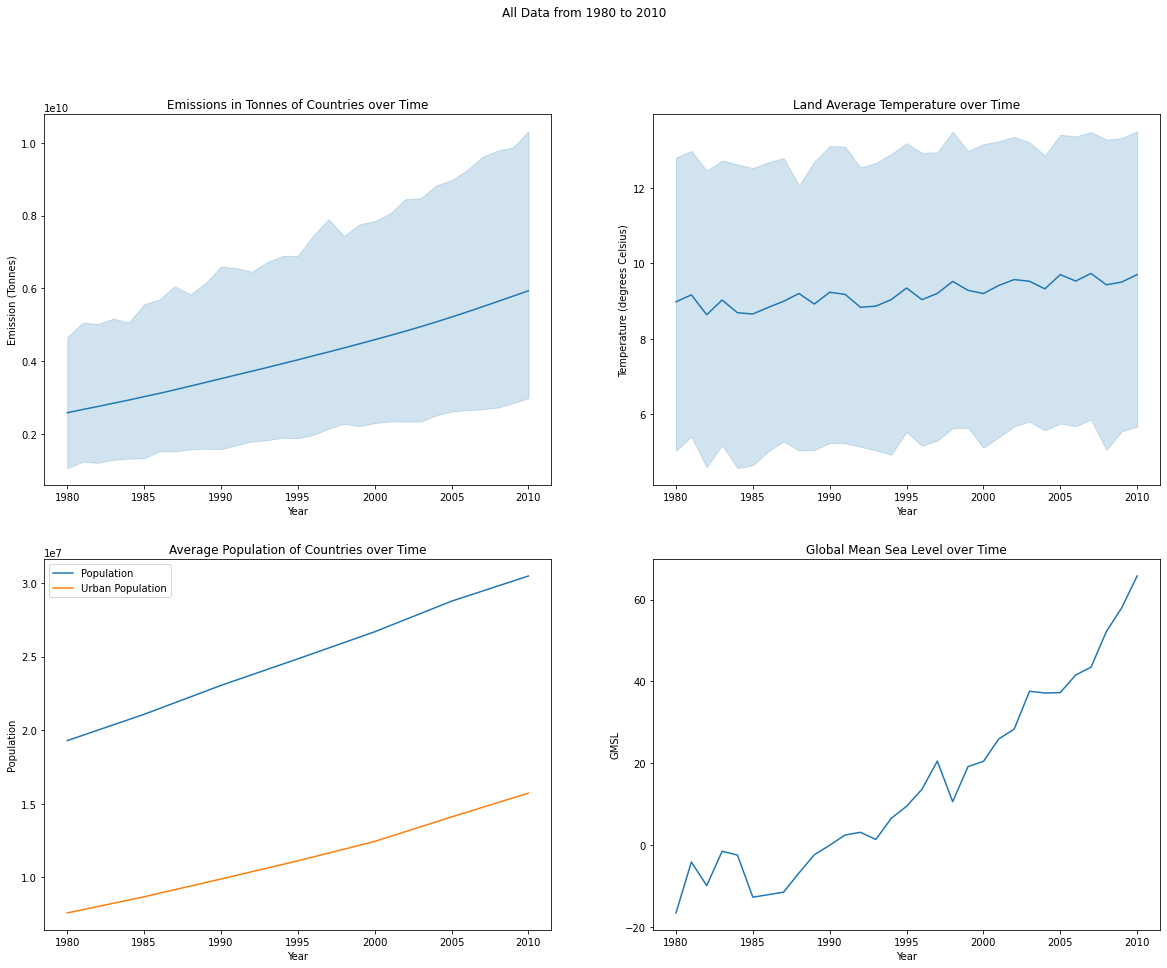

In [44]:
# Plot everything together
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('All Data from 1980 to 2010')

reg = LinearRegression()

# Plot the pollutuion from 1980 - 2010
axes[0,0].set_title('Emissions in Tonnes of Countries over Time')
sns.lineplot(ax=axes[0,0], data=tidy_emission, x="Year", y="Emission")
axes[0,0].set_ylabel('Emission (Tonnes)')

# Plot the temperature from 1980 - 2010
axes[0,1].set_title('Land Average Temperature over Time')
sns.lineplot(ax=axes[0,1], data=tidy_temperature, x="year", y="LandAverageTemperature")
axes[0,1].set_ylabel('Temperature (degrees Celsius)')
axes[0,1].set_xlabel('Year')

# Plot the population from 1980 - 2010
axes[1,0].set_title('Average Population of Countries over Time')
# get average of all countries to show general trend
means = population.groupby('Year').mean()
# see pop trend
sns.lineplot(ax=axes[1,0], data=means, x="Year", y="Population")
# see urban pop
sns.lineplot(ax=axes[1,0], data=means, x="Year", y="Urban Population")
axes[1,0].legend(labels=['Population','Urban Population'])

# Plot the sea level from 1980 - 2010
axes[1,1].set_title('Global Mean Sea Level over Time')
plot = sns.lineplot(ax=axes[1,1], data=tidy_sea_level, x="Time", y="GMSL")
axes[1,1].set_xlabel('Year')

plt.show()

From the above graphs, we can clearly see that emission. land temperature, population, urban population, and sea level have all increased from 1980 to 2010. While the temperature change is more gradual, the other datasets see a pretty drastic increase as emissions seems to have more than doubled during this time period. In addition, the sea level data clearly shows a that the ocean is rising as time goes on. This results in a reduction of land space that limits a growing population, which can only increase the demand for products and services requiring more carbon emissions.

---

We have a general understanding of the trends throughout this period, but now let us explore this data in more detail.

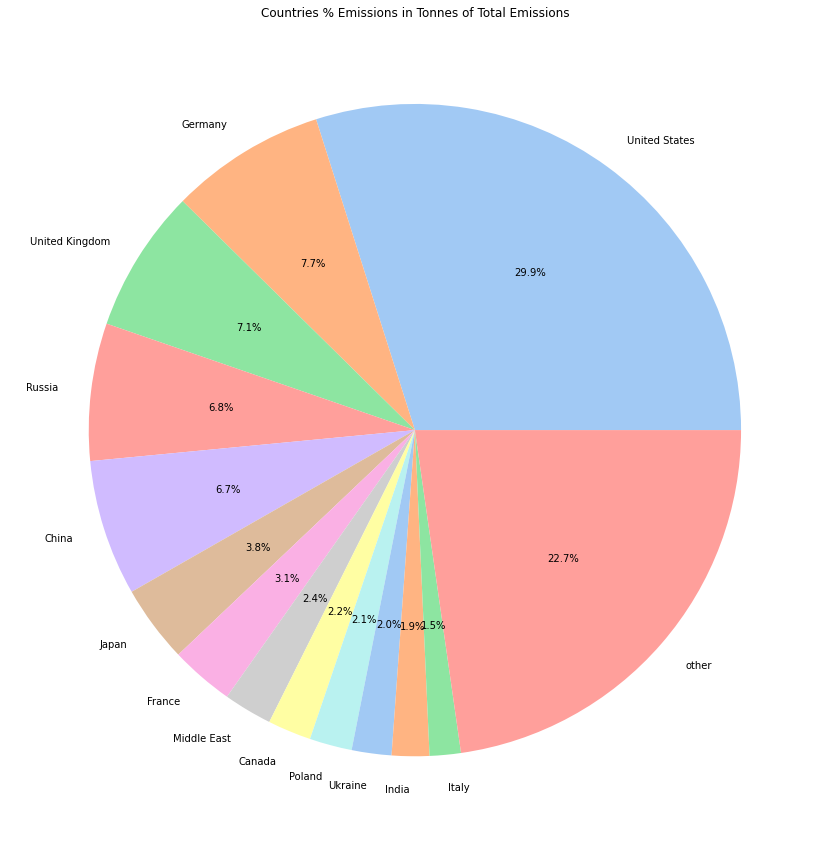

In [45]:
# pie chart of all above 1.5% emissions, and rest are combined into the section, "other"
plt.figure(figsize=(30, 15))
# sum of all country's emissions is what percent of all sums of emissions for all countries?
emission_pie = tidy_emission.groupby("Country")["Emission"].sum().sort_values(ascending=False)
new_data = emission_pie.head(13)
new_data['other'] = emission_pie[13:].sum()
colors = sns.color_palette('pastel')[0:25]
plot = new_data.plot.pie(colors = colors,autopct="%.1f%%");
plot.set_title("Countries % Emissions in Tonnes of Total Emissions")
plt.axis('off')
plt.show() # other is all under 1.5%

Looking at this pie chart for the total emission data from 1980 - 2010, we see that the United States' total emission is about 30% of all the world emission. The leading five countries for total carbon emission also make up around 60% of the whole world's emission. In addition, about 23% of the world's emissions is the accumulation of all countries that contribute less than 1.5%. This shows that despite a country's small quantity of emissions, it adds up across all the countries of the world!

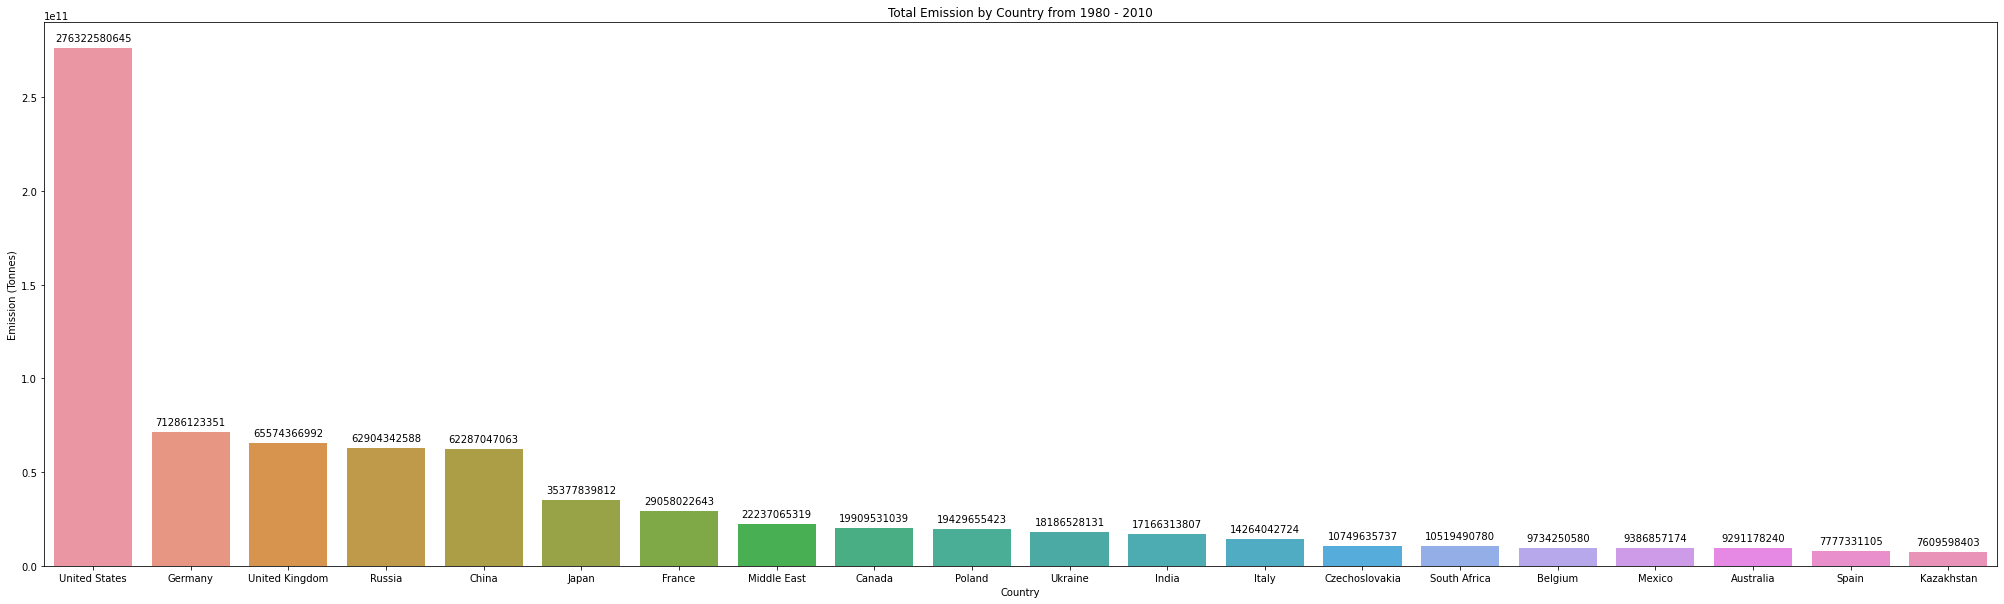

In [46]:
# get top 20 "highest emission" countries
top_emission_20 = tidy_emission.groupby('Country')['Emission'].sum().reset_index()
top_emission_20 = top_emission_20.sort_values(by=['Emission'], ascending=False).head(20)['Country'].tolist()

# make bar graph of top 20 total emissions
plt.figure(figsize=(35, 10))
in_top = tidy_emission[tidy_emission['Country'].isin(top_emission_20)]
total_top_20 = sns.barplot(
    data = in_top,
    x='Country',
    y='Emission',
    order=top_emission_20,
    ci=None
)

# label bars
for p in total_top_20.patches:
    total_top_20.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
           ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# putting label on
total_top_20.set_title("Total Emission by Country from 1980 - 2010")
plt.ylabel('Emission (Tonnes)')
plt.show()

Here is a more detailed count of total emission in tonnes from 1980 - 2010. Again, we see that the U.S. is #1 by a large lead with the next runner-up at less than one third of the United States's total emissions.

---

Now that we understand the total emissions of each country well, let's look at the emissions of each of the top 20 over time.

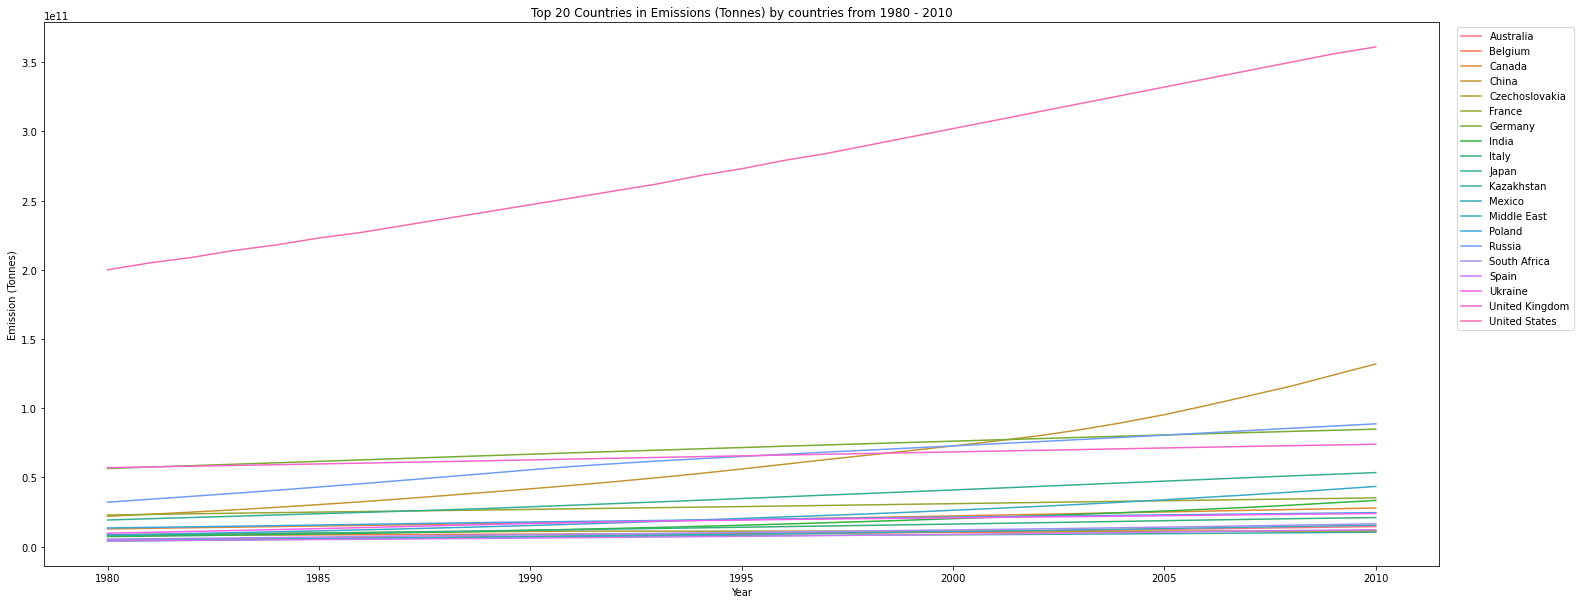

In [47]:
# another plot to show like how the top 20 do over time
plt.figure(figsize=(25, 10))
#only selecting the top 20
in_top = tidy_emission[tidy_emission['Country'].isin(top_emission_20)]
top_20_graph = sns.lineplot(
    data = in_top,
    x='Year',
    y='Emission',
    hue = 'Country',
)
#labels
top_20_graph.set_title("Top 20 Countries in Emissions (Tonnes) by countries from 1980 - 2010")
top_20_graph.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.ylabel('Emission (Tonnes)')
plt.show()

From here we can see that the United States from 1980 - 2010 is just way beyond all the other countries in emissions. We can also see that China started catching up really fast starting in around the early 2000s. In addition, we see that all these countries have an increase in emissions over this time period.

---

However, a greater quantity of emissions should correlate to a larger population, or more specifically, a larger urban population, or the country is providing for more than just its own populace (it maybe responsible for manufacturing for most of the world for example).

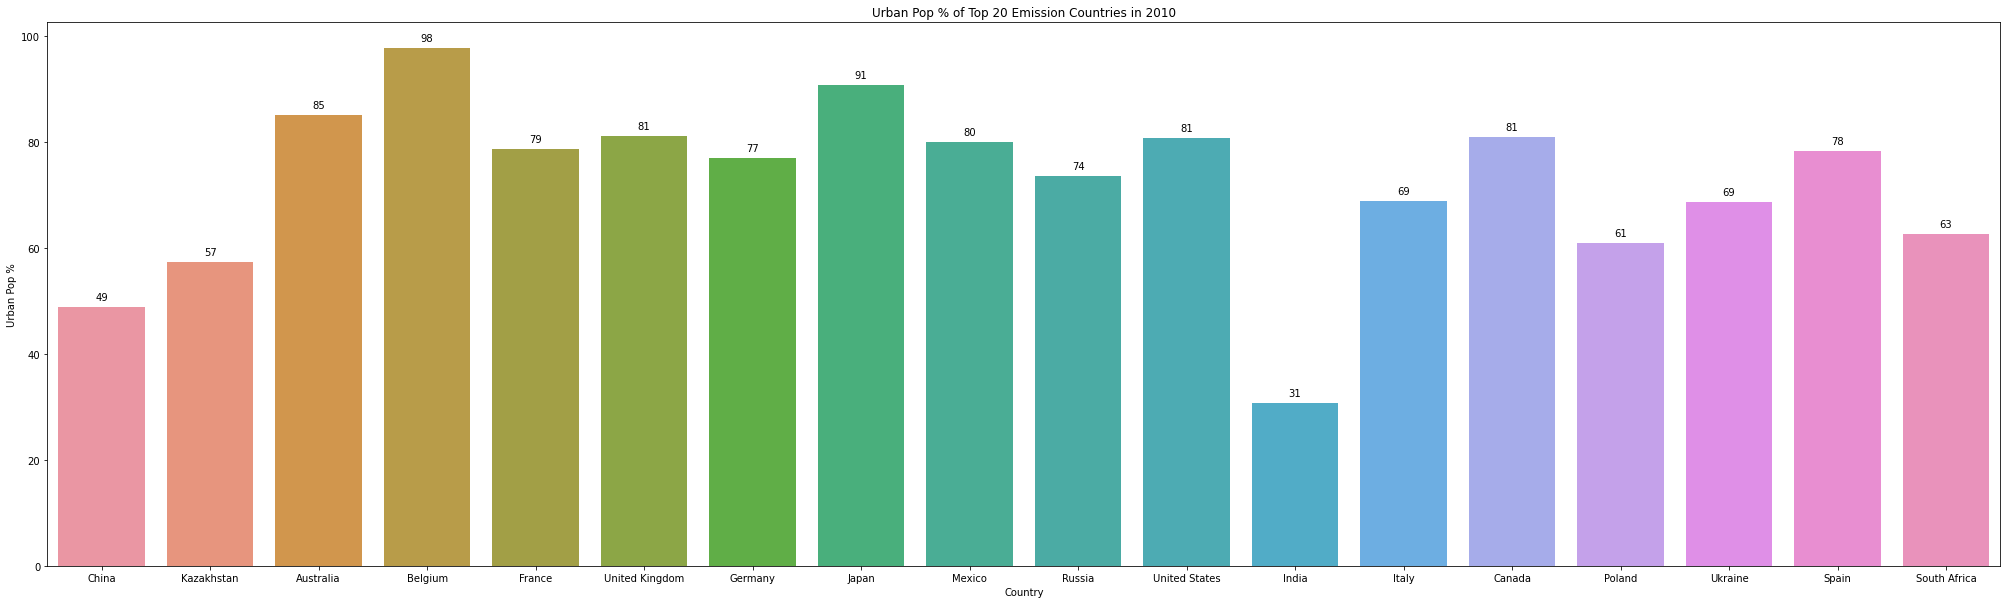

In [48]:
# Bar graph of countries urban population percent
plt.figure(figsize=(35, 10))
in_top = population[population['Country'].isin(top_emission_20)]
in_top = in_top[in_top['Year'] == 2010] # want latest population

total_top_20 = sns.barplot(
    data = in_top,
    x='Country',
    y='Urban Pop %'
)

# label bars
for p in total_top_20.patches:
    total_top_20.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
           ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# note that Middle East and Czechoslovakia are not present since the pop data is not available
total_top_20.set_title("Urban Pop % of Top 20 Emission Countries in 2010")

plt.show()

We see here that most of the populace is urban for these top 20 countries with the exception of India at 31%.

---

Let's look at this differently by plotting emissions based on the population.

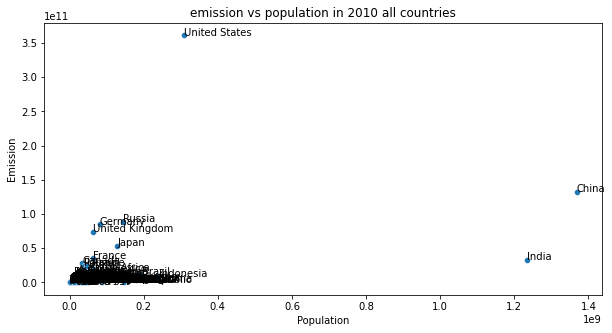

In [49]:
# emission vs population scatter plot
plt.figure(figsize=(10, 5))

new_pop = population[(population['Year'] == 2010) & (population['Population'] != 0)]
new_data = tidy_emission[tidy_emission['Year'] == 2010]
new_data["Population"] = 0
country_list = new_pop['Country'].unique()
#if the country list for emission and population match, join them to the same table
for index, row in new_data.iterrows():
  if(row['Country'] in country_list):
    new_data.at[index,"Population"] = new_pop[(new_pop['Country'] == row['Country'])]['Population']
new_data = new_data[(new_data["Population"] != 0) & (new_data["Emission"] != 0)]
plot = sns.scatterplot(data=new_data, x="Population", y="Emission")
plot.set_title('emission vs population in 2010 all countries')

#fucnction to label all those countries 
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
#actually labeling them
label_point(new_data['Population'], new_data['Emission'], new_data['Country'], plt.gca())  

This is a graph showing emission vs population data of each country to normalize the emissions and better compare countries. In order to make this graph more viewable, we will remove the extreme outliers (U.S., China, and India).

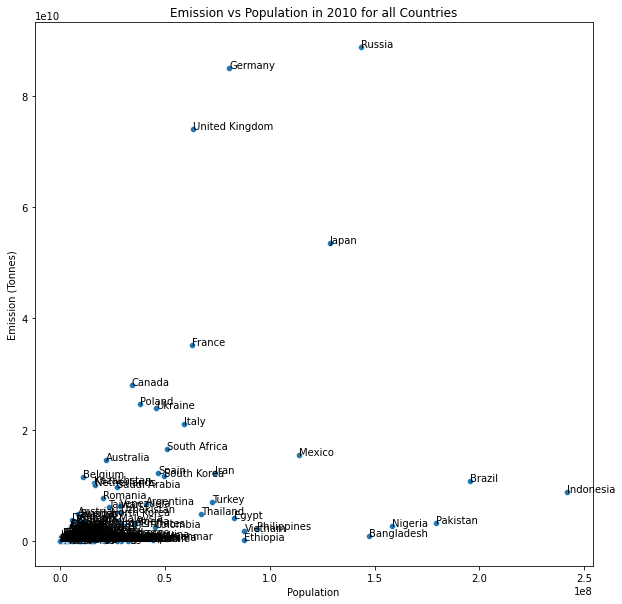

In [50]:
#spoecifying the size of the graph
plt.figure(figsize=(10, 10))

#creating a graph that excludes the extreme outliers
new_read_data = new_data[(new_data['Country'] != 'China') & (new_data['Country'] != 'United States') & (new_data['Country'] != 'India')]
plot = sns.scatterplot(data=new_read_data, x="Population", y="Emission")
plot.set_title('Emission vs Population in 2010 for all Countries')

#function that label the scatter plot points
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

#labeling them
label_point(new_read_data['Population'], new_read_data['Emission'], new_read_data['Country'], plt.gca())  

plt.ylabel('Emission (Tonnes)')
plt.show()

This is a much better viewing of the graph. The clutter at the bottom left is unavoidable due to many of those countries being undeveloped but the grey area between the middle points is much more distinct.

However, let's try to see if using the urban population is a better indicator.

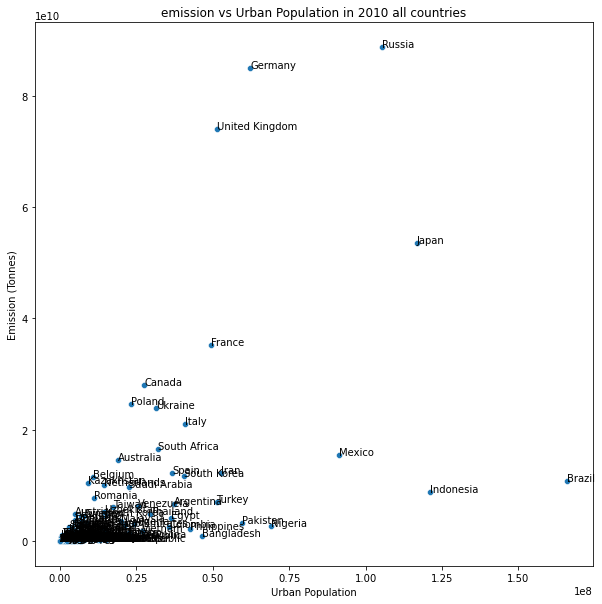

In [51]:
#plot that exclude the extreme outliers
plt.figure(figsize=(10, 10))
new_pop_urban = population[population['Year'] == 2010]
new_data_urban = tidy_emission[tidy_emission['Year'] == 2010]
new_data_urban = new_data_urban[(new_data_urban['Country'] != 'China') \
                                & (new_data_urban['Country'] != 'United States')\
                                & (new_data_urban['Country'] != 'India')]
new_data_urban['Urban Population'] = 0.0

#if they match in both tables, join them
country_list = new_pop_urban['Country'].unique()
for index, row in new_data_urban.iterrows():
  if(row['Country'] in country_list):
    new_data_urban.at[index,"Urban Population"] = new_pop_urban[(new_pop_urban['Country'] \
                                                                 == row['Country'])]['Urban Population']
#creating scatterplot
new_data_urban = new_data_urban[(new_data_urban["Urban Population"] != 0) & (new_data_urban["Emission"] != 0)]
plot = sns.scatterplot(data=new_data_urban, x="Urban Population", y="Emission")
plot.set_title('emission vs Urban Population in 2010 all countries')

#function to label
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.01, str(point['val']))

#labeling
label_point(new_data_urban['Urban Population'], new_data_urban['Emission'], new_data_urban['Country'], plt.gca())

plt.ylabel('Emission (Tonnes)')
plt.show()

Comparing the Urban population now with emission, the emission vs population now shows that some countries with large populations have a small urban population and are less developed. Thus, these countries should have a lower acceptable emissions quantity as based from the previous graph.

## Data Analysis and Data Modeling

Let's create a model for predicting the FUTURE!!!

Notice that the general trends for each dataset was linear. Thus, we will use linear regression to, when given a year, predict the sea level, temperature (for each season), and emissions.

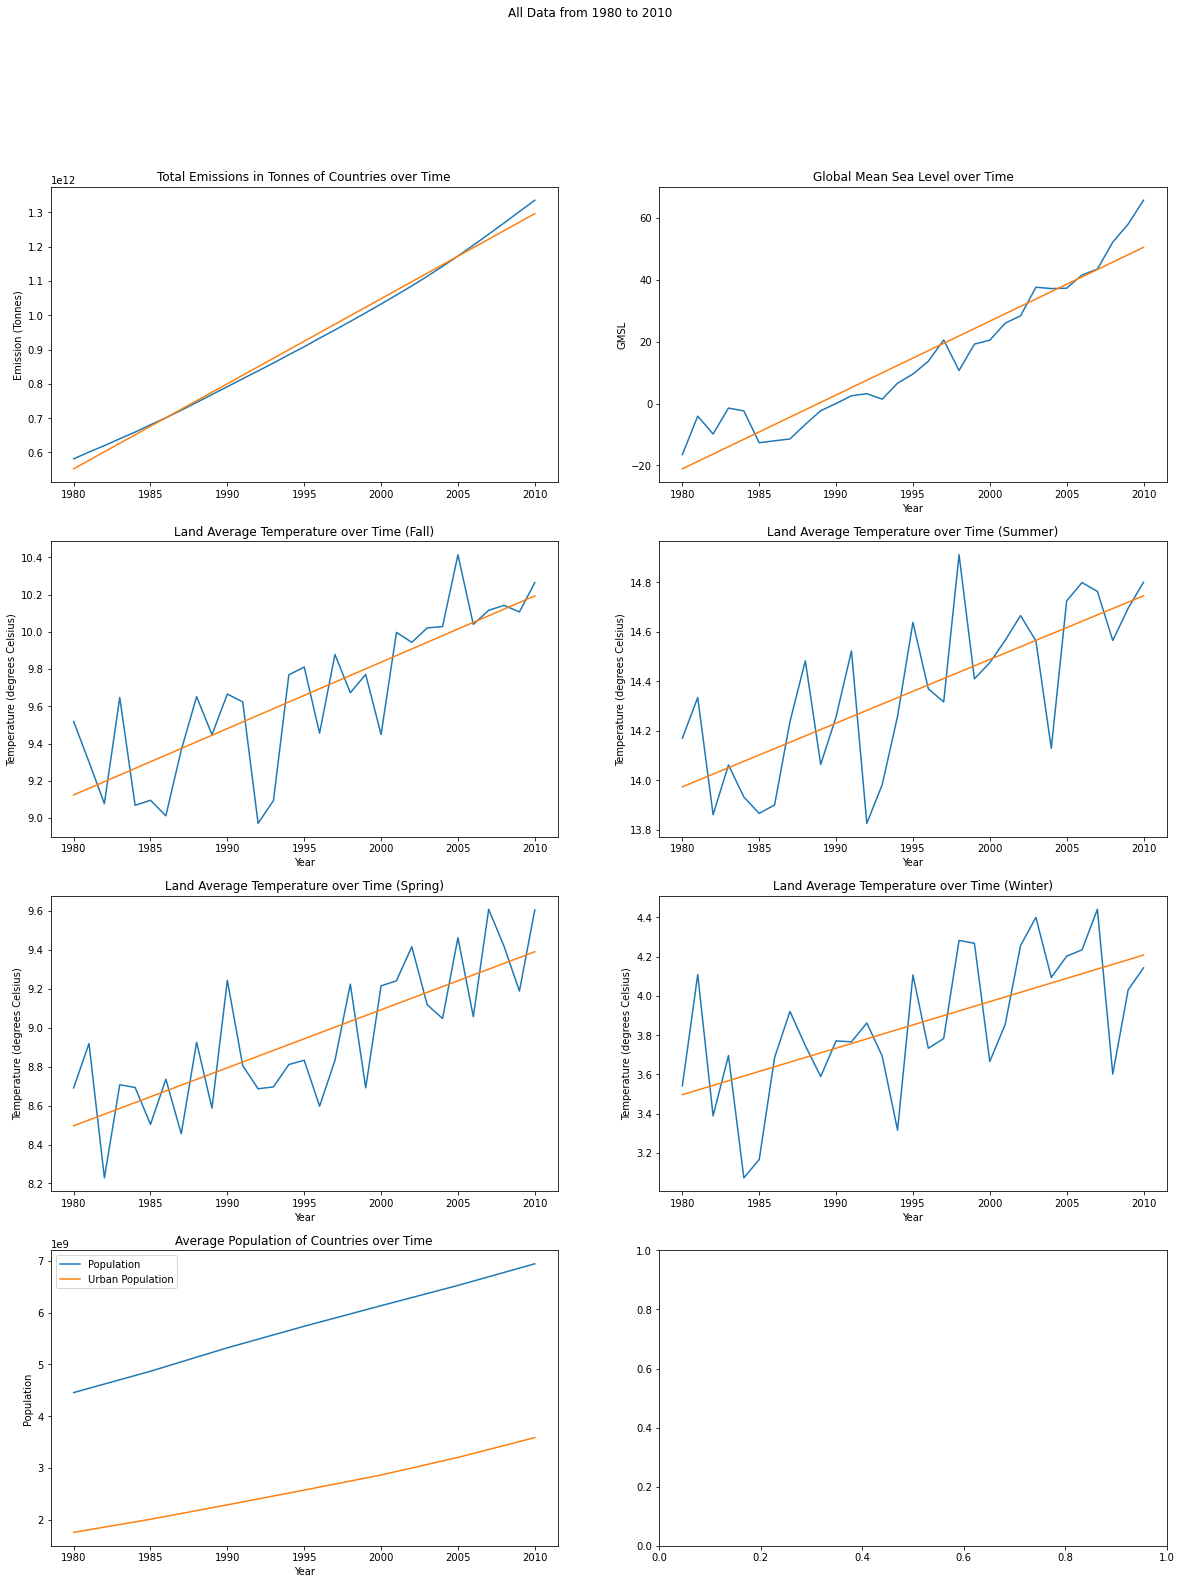

In [70]:
# use same code from before with modifications to plot regression line:

# Plot everything together
fig, axes = plt.subplots(4, 2, figsize=(20,25))
fig.suptitle('All Data from 1980 to 2010')

reg = LinearRegression() # get model for linear regession

# Plot the pollutuion from 1980 - 2010
emission_agg = tidy_emission.groupby("Year")["Emission"].sum()
axes[0,0].set_title('Total Emissions in Tonnes of Countries over Time')
sns.lineplot(ax=axes[0,0], x=tidy_emission.Year.unique(), y=emission_agg)

reg.fit(tidy_emission.Year.unique().reshape(-1, 1), emission_agg)
emission_pred = reg.predict(tidy_emission.Year.unique().reshape(-1, 1))
#looks kinda weird having a regression line that's like the same exact thing
sns.lineplot(ax=axes[0,0], x=tidy_emission.Year.unique(), y=emission_pred)

axes[0,0].set_ylabel('Emission (Tonnes)')
emissions_coef = reg.coef_

# Plot the temperature from 1980 - 2010 (summer)
summer = tidy_temperature[tidy_temperature["season"] == "summer"]
axes[1,1].set_title('Land Average Temperature over Time (Summer)')
sns.lineplot(ax=axes[1,1], data=summer, x="year", y="LandAverageTemperature")
reg.fit(summer.year.to_numpy().reshape(-1, 1), summer.LandAverageTemperature)
temp_pred = reg.predict(summer.year.to_numpy().reshape(-1, 1))
sns.lineplot(ax=axes[1,1], x=summer.year, y=temp_pred)
axes[1,1].set_ylabel('Temperature (degrees Celsius)')
axes[1,1].set_xlabel('Year')
summer_coef = reg.coef_

# Plot the temperature from 1980 - 2010 (fall)
fall = tidy_temperature[tidy_temperature["season"] == "fall"]
axes[1,0].set_title('Land Average Temperature over Time (Fall)')
sns.lineplot(ax=axes[1,0], data=fall, x="year", y="LandAverageTemperature")
reg.fit(fall.year.to_numpy().reshape(-1, 1), fall.LandAverageTemperature)
temp_pred = reg.predict(fall.year.to_numpy().reshape(-1, 1))
sns.lineplot(ax=axes[1,0], x=fall.year, y=temp_pred)
axes[1,0].set_ylabel('Temperature (degrees Celsius)')
axes[1,0].set_xlabel('Year')
fall_coef = reg.coef_


# Plot the temperature from 1980 - 2010 (winter)
winter = tidy_temperature[tidy_temperature["season"] == "winter"]
axes[2,1].set_title('Land Average Temperature over Time (Winter)')
sns.lineplot(ax=axes[2,1], data=winter, x="year", y="LandAverageTemperature")
reg.fit(winter.year.to_numpy().reshape(-1, 1), winter.LandAverageTemperature)
temp_pred = reg.predict(winter.year.to_numpy().reshape(-1, 1))
sns.lineplot(ax=axes[2,1], x=winter.year, y=temp_pred)
axes[2,1].set_ylabel('Temperature (degrees Celsius)')
axes[2,1].set_xlabel('Year')
winter_coef = reg.coef_


# Plot the temperature from 1980 - 2010 (spring)
spring = tidy_temperature[tidy_temperature["season"] == "spring"]
axes[2,0].set_title('Land Average Temperature over Time (Spring)')
sns.lineplot(ax=axes[2,0], data=spring, x="year", y="LandAverageTemperature")
reg.fit(spring.year.to_numpy().reshape(-1, 1), spring.LandAverageTemperature)
temp_pred = reg.predict(spring.year.to_numpy().reshape(-1, 1))
sns.lineplot(ax=axes[2,0], x=spring.year, y=temp_pred)
axes[2,0].set_ylabel('Temperature (degrees Celsius)')
axes[2,0].set_xlabel('Year')
spring_coef = reg.coef_


# Plot the sea level from 1980 - 2010
axes[0,1].set_title('Global Mean Sea Level over Time')
plot = sns.lineplot(ax=axes[0,1], data=tidy_sea_level, x="Time", y="GMSL")
reg.fit(tidy_sea_level.index.to_numpy().reshape(-1, 1), tidy_sea_level.GMSL)
sea_level_pred = reg.predict(tidy_sea_level.index.to_numpy().reshape(-1, 1))
sns.lineplot(ax=axes[0,1], x=tidy_sea_level.index, y=sea_level_pred)
axes[0,1].set_xlabel('Year')
sea_level_coef = reg.coef_



# Plot the population from 1980 - 2010
axes[3,0].set_title('Average Population of Countries over Time')
# get average of all countries to show general trend
sums = population.groupby('Year').sum()
# see pop trend
sns.lineplot(ax=axes[3,0], data=sums, x="Year", y="Population")
# see urban pop
sns.lineplot(ax=axes[3,0], data=sums, x="Year", y="Urban Population")
axes[3,0].legend(labels=['Population','Urban Population'])

plt.show()

## So what do these charts mean? 

Let's start with the total emissions of countries over time. From this chart we can see that total emssions has crept up from 0.6 trillion metric tons in 1980 to over 1.3 trillion today. That's more than double. In other words, according to our linear regression, we've been producing approximately 2.48 * 10^10 tons more per year every year since 1980. 

As far as sea level goes, we always hear talk of Florida sinking. When we look at the actual data, Florida's highest point is more than 300ft above sea level, so it probably will never sink. However, the Florida keys, on average, are only 18ft above sea level. Although GMSL doesn't necessarily describe the ocean level surface directly next to the keys, the rate at which is rises help us find out when the keys will sink. According to our regression, GMSL rises by about 2.4ft per year. In only 5 years, we can expect some roads in the Florida keys to be submerged.

The temperature charts are pretty easy to understand. Land Average Temperature is rising by about 0.026 degrees per year. It's gone up about 0.8 degree since 1980. In about 175 years, our winters will be as warm as your average spring in the 1980's. Snow won't form at a ground temperature of 5 degrees celsius, so we can expect no more snow in about 35 years.

As far as population goes, it is increasing at about 83.3 million per year. That doesn't describe anything about climate change, but according to the UN, 3 tonnes of pollution per capita is green, and if emissions are growing faster than population, and we are already over the per capita that is healthy, we know that we are not on track to be green.


In [53]:
emissions_coef

array([2.4794192e+10])



---

Now we know what the future may hold, let's create a model to analyze how countries are doing and help them determine how much they should cut on emissions.

First, we must classify the countries as good or EVIL by adding the "Green?" column and "emission per capita column." The sustainable number is 3 tonnes per person per year. if a country is below 3 then it is a green country and gets assigned a 1. If a country is above 3 tonnes / person / year then it is a non green country and gets assigned a 0. We will start off by using population instead of urban population so countries are more likely to green.

In [54]:
new_data["Emission per capita"] = 0.0
#if a country is green it is aggined 1, if not it is assigned 0
new_data["Green?"] = 0

#adding a column for emission per capital and classify them
for index, row in new_data.iterrows():
    per_capita_num = float(row['Emission']) / float(row['Population'])
    new_data.at[index,"Emission per capita"] = per_capita_num
    if(per_capita_num <= 3):
      new_data.at[index,"Green?"] = 1

new_data.head()

,Country,Year,Emission,Population,Emission per capita,Green?
59829,Afghanistan,2010,1.003652e+08,29185507,3.438870,0
59831,Albania,2010,2.377643e+08,2948023,80.652114,0
59832,Algeria,2010,3.132819e+09,35977455,87.077295,0
59834,Andorra,2010,1.029218e+07,84449,121.874457,0
59835,Angola,2010,3.881015e+08,23356246,16.616606,0


According to the United Nations Department of Economic and Social Affairs (UNDESA), Emission has to be reduced to 3 tons per capita to be sustainable. Hopefully this goal can be reached by 2025

source: https://www.un.org/en/development/desa/policy/wess/wess_current/2011wess_chapter2.pdf

There are only 15 green countries! Obvious to say that this awful! We won't bother calculating the urban population because no country would be green at this rate.

---

Let's mark the green countries and run classification algorithms to try and predict if a country is green. This will provide a model for countries to test numbers to see where they should be operating.

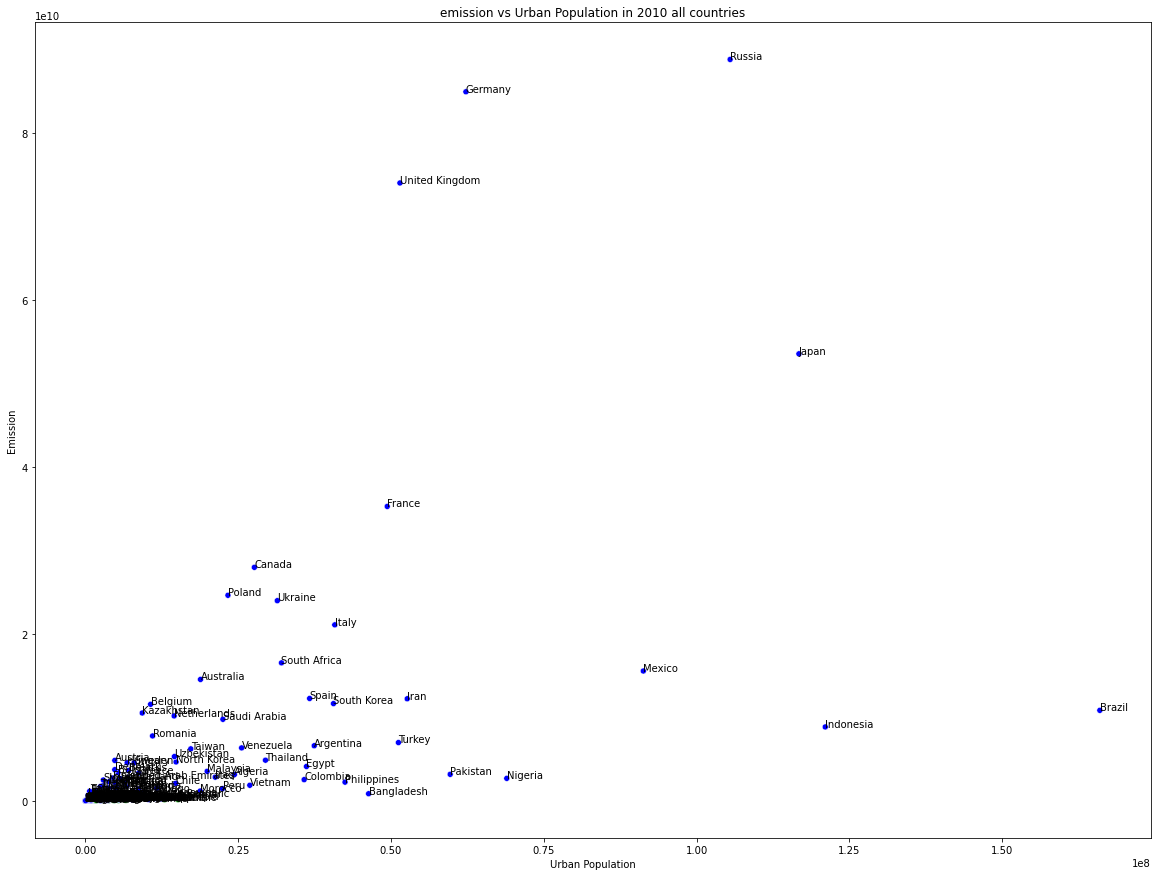

In [55]:
plt.figure(figsize=(20, 15))

colormap = np.array(['b', 'g'])
mask = []
for row in new_data_urban["Country"]:
  if row in new_data[new_data["Green?"] == 1].astype(str)["Country"].tolist():
    mask.append('g')
  else:
    mask.append('b')
mask = np.array(mask)

plot = sns.scatterplot(data=new_data_urban, x="Urban Population", y="Emission", c=mask)
plot.set_title('emission vs Urban Population in 2010 all countries')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.01, str(point['val']))

label_point(new_data_urban['Urban Population'], new_data_urban['Emission'], new_data_urban['Country'], plt.gca())  

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X = new_data.iloc[:,2:-1].values
y = new_data["Green?"].astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
print (cross_val_score(classifier, X, y, cv=10))

[0.95       0.9        0.9        1.         0.95       1.
 1.         1.         0.94736842 0.94736842]


Our model using the K nearest neighbor was able to predict with a really high accuracy whether a country will be green or not. However, let's try to get a better model that does not go below 95% accuracy.

In [57]:
# Random Forests

forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(X, y)

print (cross_val_score(forest, X, y, cv=10))

[1.   0.95 0.95 1.   1.   1.   1.   1.   1.   1.  ]


Our Random forest model did better in cross-validation than our KNN model, so we will recommend this one for countries to evaluate their performance.



## Interpretation and Policy Decision:

#### Putting it altogether:

We found that the more developed countries have the highest emissions and it is increasing by 2.48 * 10^10 metric tons per year. This is causing the temperature to gradually increase. Eventually, it may never snow again!

Besides the linear model, we also created a model for classifing countries. The Random Forests model was more accurate so this will help countries determine how they should limit emissions based on their population. However, other factors like how a country provides for others also affects this, so the model is a generalized tool.

---

#### Implementing Change:

We can see that the Paris Agreement is a must, especially for the U.S. Thus, more countries should adopt a similar promise to reduce emissions to protect future generations.

Since a growing population ultimately requires more production, instead of only limiting emissions, we suggest a heavy push for implementing clean energy sources. While consumerism needs to be controlled (especially in the U.S.), clean energy will provide more time for the needed change in culture and mindset of politicians and everyday citizens.